# Solve the Schrödinger Equation for the Two-Level System

The two-level system is defined by a Hilbert space covered by a basis that consists of a ground state $\left| 0 \right>$ and an excited state $\left| 1 \right>$.

    __1_
     |
     |  Ω
     |
    __0_

The first thing we need to do is define the field that is going to interact with the atom. In this simple case all we need to do is specify the levels that the field is going to couple -- in this case levels $\left| 0 \right>$ and $\left| 1 \right>$ -- and the strength of the interaction defined by the Rabi frequency $\Omega$ which we'll set to $2\pi \times 5 \mathrm{MHz}$

**NOTE**: It's easiest to express Rabi frequencies, detunings and Hamiltonians in terms of frequencies $2\pi \nu$ and let $\hbar = 1$.

In [1]:
field_dict = {'coupled_levels':[[0,1]], 'rabi_freq': 5.0} # [2π MHz]

Next we'll create an `OBAtom` object representing the two-level atom (all we need to do is specify `num_states` and add the field. The field is in a list as in more complex systems we may have multiple fields.

In [2]:
from maxwellbloch import ob_atom
ob_two = ob_atom.OBAtom(num_states=2, fields=[field_dict])

Next we'll define a set of timepoints over which we wish to solve the system. If we're using energy units of 2π MHz we use corresponding time units of µs.

In [3]:
import numpy as np
tlist = np.linspace(0., 1., 201) # [µs]

Now to solve the system we call the `mesolve` method on `ob_two`.

In [4]:
ob_two.mesolve(tlist)

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

Here `mesolve` stands for 'master equation', though in this case as we are defining a closed quantum system (i.e. no collapse operators) `sesolve` tells us it's the Schrödinger equation.

Now we can return the solved quantum state of the system over time with the `states_t()` method, and plot the result.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

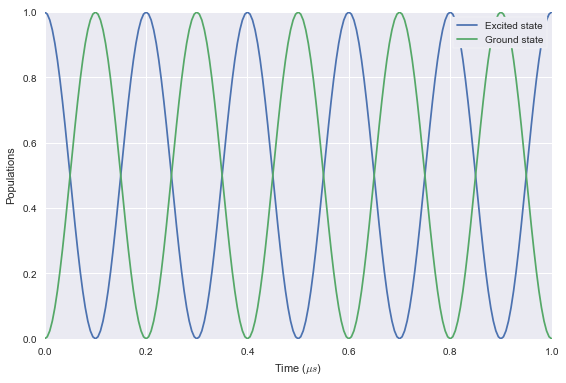

In [6]:
pop_0 = np.absolute(ob_two.states_t()[:,0])**2 # Ground state population
pop_1 = np.absolute(ob_two.states_t()[:,1])**2 # Excited state population

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(tlist, pop_0, label='Excited state')
ax.plot(tlist, pop_1, label='Ground state')
ax.set_xlabel(r'Time ($\mu s$)')
ax.set_ylabel(r'Populations')
ax.set_ylim([0.,1])
leg = ax.legend(frameon=True)

The population, initally into the ground state, is driven entirely into the excited state and makes five complete oscillations over a microsecond.